In [1]:
!pip install shap

In [1]:
import pickle
from sklearn.metrics import f1_score
import spacy_universal_sentence_encoder
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier

In [27]:
import pandas as pd
import numpy as np
import lime
from lime import lime_text
from lime.lime_text import LimeTextExplainer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import shap

In [22]:
gt_features = pd.read_csv('../../data/features_GT.csv')
gpt_features = pd.read_csv('../../data/features_ChatGPT.csv')
gt_features = gt_features.iloc[:,1:20]
gpt_features = gpt_features.iloc[:,1:20]

In [23]:
X = pd.concat([gt_features, gpt_features], axis=0)

gt_class = pd.DataFrame(np.zeros(gt_features.shape[0]))  # Ground Truth --> 0
gpt_class = pd.DataFrame(np.ones(gpt_features.shape[0]))  # GPT --> 1
y = pd.concat([gt_class, gpt_class], axis=0)

X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=0.33, random_state=42)

In [24]:
from sklearn import ensemble
n_estimators = 500
gbm = ensemble.GradientBoostingClassifier(
            n_estimators=n_estimators,
            validation_fraction=0.2,
            n_iter_no_change=5, 
            tol=0.01,
            random_state=0)
gbm = ensemble.GradientBoostingClassifier(
            n_estimators=n_estimators,
            random_state=0)
gbm.fit(X_train, y_train)

C:\Users\amart\anaconda3\envs\ldk\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(n_estimators=500, random_state=0)

[0.06976165 0.21511826 0.01781654 0.26845638 0.04819511 0.18600787
 0.00593896 0.         0.         0.         0.         0.
 0.07955235 0.02153294 0.00659442 0.00408384 0.05380708 0.00961461
 0.01351999]


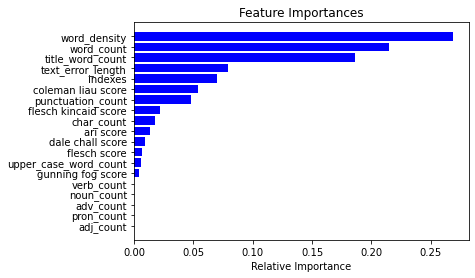

In [25]:
print(gbm.feature_importances_)
importances = gbm.feature_importances_
indices = np.argsort(importances)
features = X_train.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [28]:
# compute SHAP values
explainer = shap.Explainer(gbm, X_test)
shap_values = explainer(X_test)

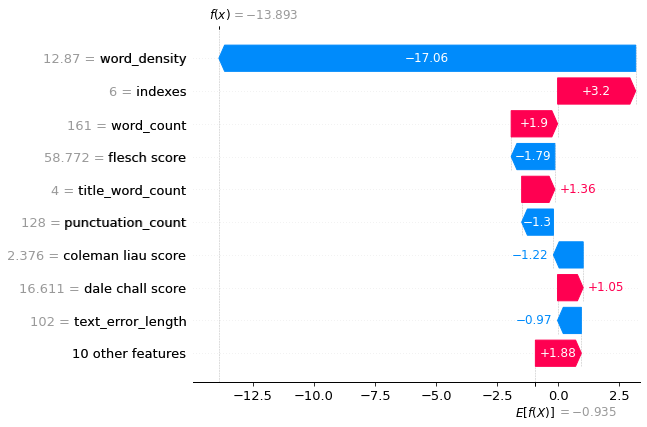

In [29]:
shap.plots.waterfall(shap_values[0])